In [19]:
#Let's read the dataset
import pandas as pd
df = pd.read_csv("../titanic.csv")

Today is the 5 day of our challenge of 100 days of Machine Learning. Today we will learn how to find correlation between features in the dataset and plot the heatmp

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
#Let's get rid of None values from our dataset as we do not need them
df = df.dropna()

In [22]:
#Now we will convert categorical columns into numerical as we can find correlation only with numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
ohe = OneHotEncoder()
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

/var/folders/68/gflyxwqj6s774zssgp4rbn_r0000gn/T/ipykernel_6255/2400562304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"]=le.fit_transform(df["Sex"])


In [23]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,0.148495,-0.089136,-0.025205,0.030933,-0.083488,-0.051454,0.029740,-0.053701,0.045466
Survived,0.148495,1.000000,-0.034542,-0.532418,-0.254085,0.106346,0.023582,0.134241,-0.038544,-0.095861
Pclass,-0.089136,-0.034542,1.000000,-0.046181,-0.306514,-0.103592,0.047496,-0.315235,-0.039131,0.238755
Sex,-0.025205,-0.532418,-0.046181,1.000000,0.184969,-0.104291,-0.089581,-0.130433,-0.004024,0.063146
Age,0.030933,-0.254085,-0.306514,0.184969,1.000000,-0.156162,-0.271271,-0.092424,0.019038,-0.088568
SibSp,-0.083488,0.106346,-0.103592,-0.104291,-0.156162,1.000000,0.255346,0.286433,0.169446,0.019780
Parch,-0.051454,0.023582,0.047496,-0.089581,-0.271271,0.255346,1.000000,0.389740,-0.066406,0.088214
Fare,0.029740,0.134241,-0.315235,-0.130433,-0.092424,0.286433,0.389740,1.000000,0.015625,-0.242172
Embarked_Q,-0.053701,-0.038544,-0.039131,-0.004024,0.019038,0.169446,-0.066406,0.015625,1.000000,-0.138314
Embarked_S,0.045466,-0.095861,0.238755,0.063146,-0.088568,0.019780,0.088214,-0.242172,-0.138314,1.000000


There is specific method corr() which can calculate correlation between features in dataset and makes dataframe from all correlations. As we need in the future predict that one has survived or not
so we should analyse Survived column the most with the other features. From above data we can see that the Gender effects the most to Survived column. In the second place is Age which also plays role 
in Survived column. But there is one more information that they are negatively correlated. Positively correlated features are Fare and SibSp, but they don't effect as much as Gender and Age.

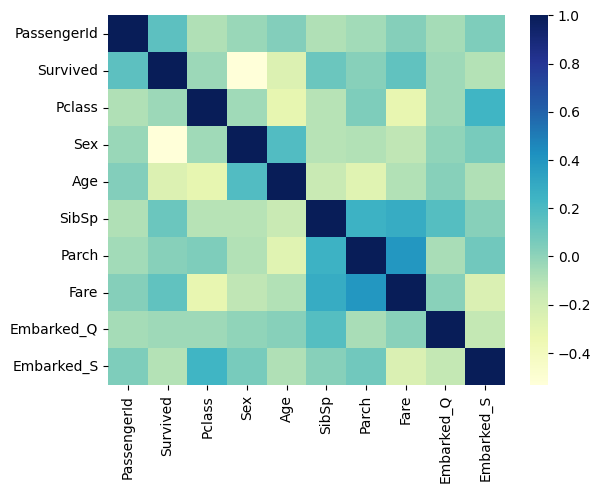

In [ ]:
#Let's make a heatmap which clearly shows the correlation between features in our dataset
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)